<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# data path
dpath = "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# H1N1 Model.ver1

In [4]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')

In [5]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [6]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_s = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_s = model_h1n1_ver1_s.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 8ms/step - loss: 0.5283 - accuracy: 0.7621 - val_loss: 0.5020 - val_accuracy: 0.7857
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.7859 - val_loss: 0.4894 - val_accuracy: 0.7928
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.7894 - val_loss: 0.4817 - val_accuracy: 0.7936
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.7915 - val_loss: 0.4779 - val_accuracy: 0.7928
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.7938 - val_loss: 0.4713 - val_accuracy: 0.7976
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4615 - accuracy: 0.7975 - val_loss: 0.4675 - val_accuracy: 0.8008
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.7989 - val_loss: 0.4652 - val_accuracy: 0.8029
Epoch 8/20
39/39 [==

**layer 8개**


In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_b = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_b = model_h1n1_ver1_b.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.5069 - accuracy: 0.7860 - val_loss: 0.4731 - val_accuracy: 0.7926
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4673 - accuracy: 0.7950 - val_loss: 0.4671 - val_accuracy: 0.7984
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4595 - accuracy: 0.8015 - val_loss: 0.4701 - val_accuracy: 0.8055
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4566 - accuracy: 0.8039 - val_loss: 0.4589 - val_accuracy: 0.8067
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.8047 - val_loss: 0.4544 - val_accuracy: 0.8043
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4481 - accuracy: 0.8054 - val_loss: 0.4528 - val_accuracy: 0.8069
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.8102 - val_loss: 0.4632 - val_accuracy: 0.8045
Epoch 8/20
39/39 [==

#### visualize

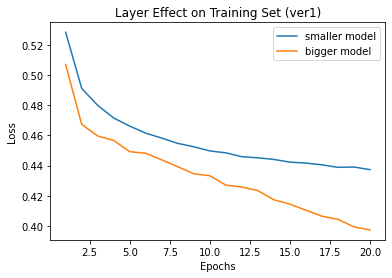

In [9]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_s = history_h1n1_ver1_s.history
history_dict_h1n1_ver1_b = history_h1n1_ver1_b.history

loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["loss"]
loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

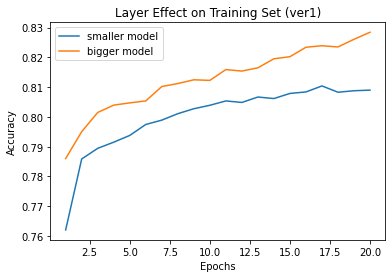

In [10]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["accuracy"]
acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

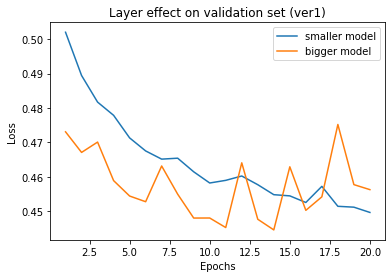

In [11]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_loss"]
val_loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

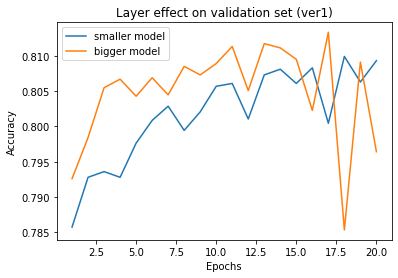

In [12]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_accuracy"]
val_acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 1.8897 - accuracy: 0.7730 - val_loss: 1.3705 - val_accuracy: 0.7882
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.0667 - accuracy: 0.7943 - val_loss: 0.7967 - val_accuracy: 0.8004
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.7991 - val_loss: 0.5724 - val_accuracy: 0.7920
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5368 - accuracy: 0.7988 - val_loss: 0.5195 - val_accuracy: 0.8019
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5051 - accuracy: 0.8029 - val_loss: 0.5016 - val_accuracy: 0.8031
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4868 - accuracy: 0.8067 - val_loss: 0.4988 - val_accuracy: 0.8079
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4788 - accuracy: 0.8087 - val_loss: 0.4883 - val_accuracy: 0.8067
Epoch 8/20
39/39 [=

**layer 8개 + L1 regularization 2개**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 2.0041 - accuracy: 0.7837 - val_loss: 1.4967 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.1609 - accuracy: 0.7932 - val_loss: 0.8926 - val_accuracy: 0.7914
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7247 - accuracy: 0.7972 - val_loss: 0.6286 - val_accuracy: 0.7964
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5821 - accuracy: 0.8025 - val_loss: 0.5592 - val_accuracy: 0.8085
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5387 - accuracy: 0.8032 - val_loss: 0.5326 - val_accuracy: 0.8059
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5114 - accuracy: 0.8023 - val_loss: 0.5489 - val_accuracy: 0.7652
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4948 - accuracy: 0.8072 - val_loss: 0.5091 - val_accuracy: 0.8073
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 1개**

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6298 - accuracy: 0.7863 - val_loss: 0.5548 - val_accuracy: 0.7938
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5349 - accuracy: 0.7931 - val_loss: 0.5260 - val_accuracy: 0.7910
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4973 - accuracy: 0.7966 - val_loss: 0.5054 - val_accuracy: 0.7942
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4773 - accuracy: 0.8010 - val_loss: 0.4878 - val_accuracy: 0.8047
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4681 - accuracy: 0.8028 - val_loss: 0.4727 - val_accuracy: 0.8043
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.8064 - val_loss: 0.4706 - val_accuracy: 0.7996
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.8071 - val_loss: 0.4643 - val_accuracy: 0.7990
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 2개**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6760 - accuracy: 0.7610 - val_loss: 0.5854 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5408 - accuracy: 0.7934 - val_loss: 0.5522 - val_accuracy: 0.7723
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.7979 - val_loss: 0.5004 - val_accuracy: 0.7946
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4864 - accuracy: 0.8021 - val_loss: 0.4884 - val_accuracy: 0.8027
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.8051 - val_loss: 0.4870 - val_accuracy: 0.7966
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.8062 - val_loss: 0.4783 - val_accuracy: 0.7974
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4604 - accuracy: 0.8061 - val_loss: 0.4651 - val_accuracy: 0.8067
Epoch 8/20
39/39 [=

**layer 8개 + L1&L2 regularization 1개**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 2.1568 - accuracy: 0.7855 - val_loss: 1.5848 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.2365 - accuracy: 0.7865 - val_loss: 0.9355 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.7497 - accuracy: 0.7931 - val_loss: 0.6393 - val_accuracy: 0.7976
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5887 - accuracy: 0.7995 - val_loss: 0.5648 - val_accuracy: 0.8004
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5389 - accuracy: 0.8020 - val_loss: 0.5295 - val_accuracy: 0.8063
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5112 - accuracy: 0.8052 - val_loss: 0.5192 - val_accuracy: 0.7952
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4962 - accuracy: 0.8047 - val_loss: 0.5170 - val_accuracy: 0.7946
Epoch 8/20
39/39 [=

### visualize

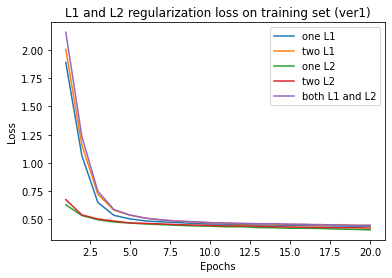

In [22]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 regularization loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

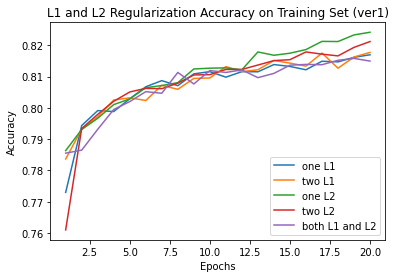

In [23]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

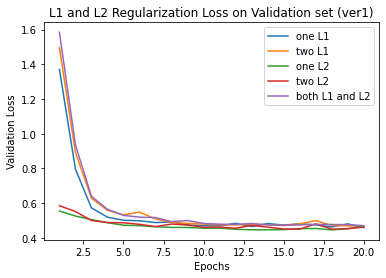

In [24]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

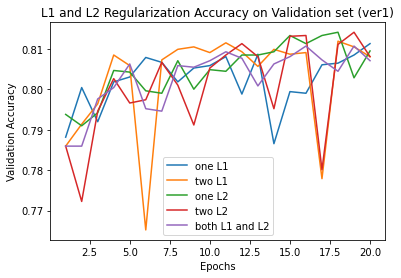

In [25]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_one = model_h1n1_ver1_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 1.1262 - accuracy: 0.7731 - val_loss: 0.8698 - val_accuracy: 0.7946
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.7300 - accuracy: 0.7929 - val_loss: 0.6264 - val_accuracy: 0.8021
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.7992 - val_loss: 0.5379 - val_accuracy: 0.7974
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5137 - accuracy: 0.7997 - val_loss: 0.5061 - val_accuracy: 0.8027
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.8025 - val_loss: 0.4849 - val_accuracy: 0.8053
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.8048 - val_loss: 0.4758 - val_accuracy: 0.8057
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4640 - accuracy: 0.8082 - val_loss: 0.4819 - val_accuracy: 0.7988
Epoch 8/20
39/39 [=

**0.002**

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_two = model_h1n1_ver1_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.7620 - accuracy: 0.7841 - val_loss: 0.6455 - val_accuracy: 0.7922
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5962 - accuracy: 0.7967 - val_loss: 0.5489 - val_accuracy: 0.8025
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5236 - accuracy: 0.8005 - val_loss: 0.5836 - val_accuracy: 0.7269
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.8016 - val_loss: 0.5018 - val_accuracy: 0.8065
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.8045 - val_loss: 0.4791 - val_accuracy: 0.8093
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.8070 - val_loss: 0.5034 - val_accuracy: 0.7672
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4588 - accuracy: 0.8098 - val_loss: 0.4700 - val_accuracy: 0.8069
Epoch 8/20
39/39 [=

**0.001(original)**

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_three = model_h1n1_ver1_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6408 - accuracy: 0.7766 - val_loss: 0.5712 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5426 - accuracy: 0.7885 - val_loss: 0.5282 - val_accuracy: 0.7912
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5020 - accuracy: 0.8021 - val_loss: 0.5036 - val_accuracy: 0.8010
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4845 - accuracy: 0.8026 - val_loss: 0.4853 - val_accuracy: 0.8071
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.8030 - val_loss: 0.4820 - val_accuracy: 0.8077
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4635 - accuracy: 0.8068 - val_loss: 0.4694 - val_accuracy: 0.8079
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 0.8076 - val_loss: 0.4670 - val_accuracy: 0.8069
Epoch 8/20
39/39 [=

**0.0005**

In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_four = model_h1n1_ver1_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5819 - accuracy: 0.7751 - val_loss: 0.5343 - val_accuracy: 0.7904
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5178 - accuracy: 0.7948 - val_loss: 0.5014 - val_accuracy: 0.8033
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4934 - accuracy: 0.7994 - val_loss: 0.5061 - val_accuracy: 0.7892
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4783 - accuracy: 0.8037 - val_loss: 0.4779 - val_accuracy: 0.8043
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4680 - accuracy: 0.8045 - val_loss: 0.4718 - val_accuracy: 0.8073
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4603 - accuracy: 0.8069 - val_loss: 0.4810 - val_accuracy: 0.8017
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.8086 - val_loss: 0.4668 - val_accuracy: 0.8010
Epoch 8/20
39/39 [=

**0.0001**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_five = model_h1n1_ver1_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5198 - accuracy: 0.7887 - val_loss: 0.4901 - val_accuracy: 0.7910
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4795 - accuracy: 0.7984 - val_loss: 0.4793 - val_accuracy: 0.8025
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.8022 - val_loss: 0.5186 - val_accuracy: 0.7632
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.8041 - val_loss: 0.4648 - val_accuracy: 0.8047
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.8056 - val_loss: 0.4611 - val_accuracy: 0.8051
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4509 - accuracy: 0.8088 - val_loss: 0.4602 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.8113 - val_loss: 0.4723 - val_accuracy: 0.7988
Epoch 8/20
39/39 [=

### visualize

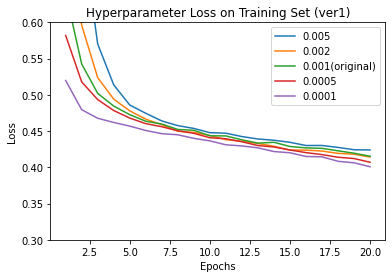

In [35]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_one = history_h1n1_ver1_one.history
history_dict_h1n1_ver1_two = history_h1n1_ver1_two.history
history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
history_dict_h1n1_ver1_four = history_h1n1_ver1_four.history
history_dict_h1n1_ver1_five = history_h1n1_ver1_five.history

loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["loss"]
loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["loss"]
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]
loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["loss"]
loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

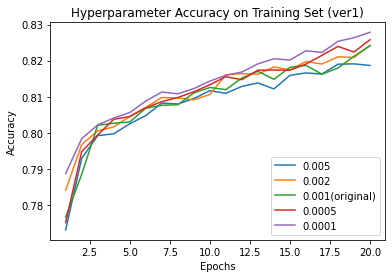

In [36]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["accuracy"]
acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["accuracy"]
acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["accuracy"]
acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["accuracy"]
acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver1_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

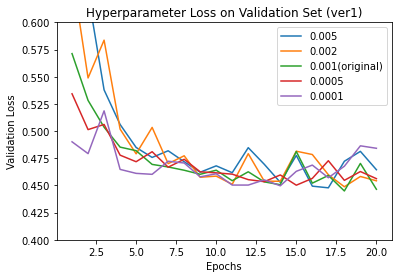

In [37]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_loss"]
val_loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_loss"]
val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_loss"]
val_loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

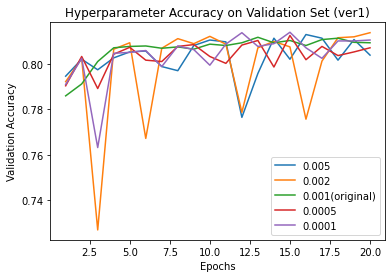

In [38]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_accuracy"]
val_acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_accuracy"]
val_acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_accuracy"]
val_acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_accuracy"]
val_acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_onedr = model_h1n1_ver1_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6580 - accuracy: 0.7807 - val_loss: 0.5763 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5572 - accuracy: 0.7860 - val_loss: 0.5344 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5180 - accuracy: 0.7895 - val_loss: 0.5141 - val_accuracy: 0.7958
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4967 - accuracy: 0.7967 - val_loss: 0.4921 - val_accuracy: 0.8061
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4837 - accuracy: 0.8007 - val_loss: 0.4860 - val_accuracy: 0.8033
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4715 - accuracy: 0.8034 - val_loss: 0.4742 - val_accuracy: 0.8071
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4618 - accuracy: 0.8085 - val_loss: 0.4879 - val_accuracy: 0.8071
Epoch 8/20
39/39 [=

**# dropout = 2**

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_twodr = model_h1n1_ver1_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 12ms/step - loss: 0.6639 - accuracy: 0.7838 - val_loss: 0.6046 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7870 - val_loss: 0.5779 - val_accuracy: 0.7922
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5264 - accuracy: 0.7885 - val_loss: 0.5077 - val_accuracy: 0.8043
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5025 - accuracy: 0.7969 - val_loss: 0.5157 - val_accuracy: 0.7833
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4874 - accuracy: 0.8005 - val_loss: 0.4911 - val_accuracy: 0.7936
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.8025 - val_loss: 0.4820 - val_accuracy: 0.8041
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4666 - accuracy: 0.8054 - val_loss: 0.4741 - val_accuracy: 0.8041
Epoch 8/20
39/39 [=

**# dropout = 3**

In [41]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_threedr = model_h1n1_ver1_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6847 - accuracy: 0.7779 - val_loss: 0.7105 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5883 - accuracy: 0.7859 - val_loss: 0.5890 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5466 - accuracy: 0.7859 - val_loss: 0.5572 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7859 - val_loss: 0.5353 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4999 - accuracy: 0.7859 - val_loss: 0.5368 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.7859 - val_loss: 0.5021 - val_accuracy: 0.7859
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4805 - accuracy: 0.7859 - val_loss: 0.4914 - val_accuracy: 0.7859
Epoch 8/20
39/39 [=

### visualize

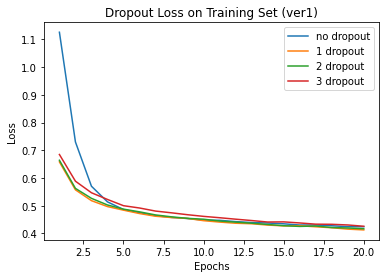

In [42]:
# Dropout effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_onedr = history_h1n1_ver1_onedr.history
history_dict_h1n1_ver1_twodr = history_h1n1_ver1_twodr.history
history_dict_h1n1_ver1_threedr = history_h1n1_ver1_threedr.history

loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["loss"]
loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["loss"]
loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

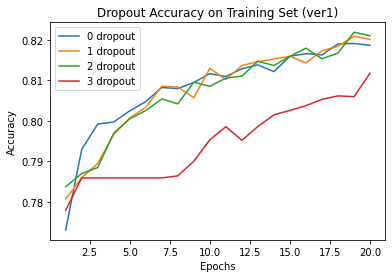

In [43]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["accuracy"]
acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["accuracy"]
acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

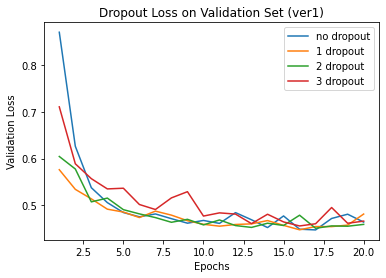

In [44]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_loss"]
val_loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_loss"]
val_loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

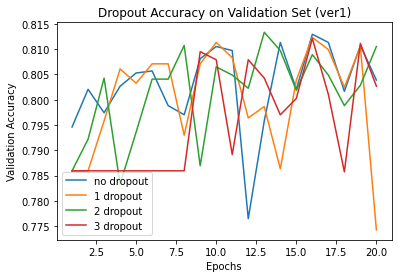

In [45]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_accuracy"]
val_acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_accuracy"]
val_acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# H1N1 Model.ver2

In [46]:
train_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver2.csv')

In [47]:
print(train_h1n1_ver2.shape)
train_h1n1_ver2.head()

(24828, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [48]:
train_h1n1_ver2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'h1n1_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [49]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver2.iloc[:,1:-1]
target = train_h1n1_ver2['h1n1_vaccine']

x_train_h1n1_ver2, x_valid_h1n1_ver2, y_train_h1n1_ver2, y_valid_h1n1_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [50]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_s = keras.Sequential([
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_s = model_h1n1_ver2_s.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 7ms/step - loss: 0.5521 - accuracy: 0.7473 - val_loss: 0.4939 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4634 - accuracy: 0.7893 - val_loss: 0.4283 - val_accuracy: 0.8027
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8255 - val_loss: 0.3471 - val_accuracy: 0.8776
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.8940 - val_loss: 0.2509 - val_accuracy: 0.9062
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.9431 - val_loss: 0.1734 - val_accuracy: 0.9589
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1384 - accuracy: 0.9788 - val_loss: 0.1118 - val_accuracy: 0.9956
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0848 - accuracy: 0.9971 - val_loss: 0.0644 - val_accuracy: 0.9996
Epoch 8/20
39/39 [==

**layer 8개**
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [51]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_b = model_h1n1_ver2_b.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.3871 - accuracy: 0.8321 - val_loss: 0.1220 - val_accuracy: 0.9801
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.9981 - val_loss: 3.7569e-04 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 1.2290e-04 - accuracy: 1.0000 - val_loss: 2.2904e-05 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.9769 - val_loss: 3.2101e-05 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 2.9959e-05 - accuracy: 1.0000 - val_loss: 3.0360e-05 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 2.6381e-05 - accuracy: 1.0000 - val_loss: 2.3234e-05 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 1.2062e-05 - accuracy: 1.0000 - val_loss: 4.0942e-06 - 

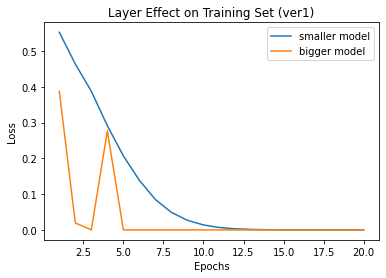

In [52]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_s = history_h1n1_ver2_s.history
history_dict_h1n1_ver2_b = history_h1n1_ver2_b.history

loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["loss"]
loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

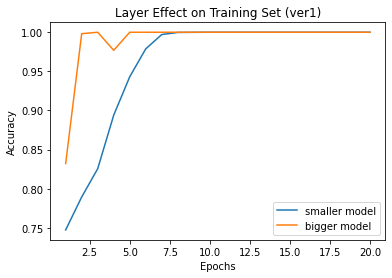

In [53]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["accuracy"]
acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

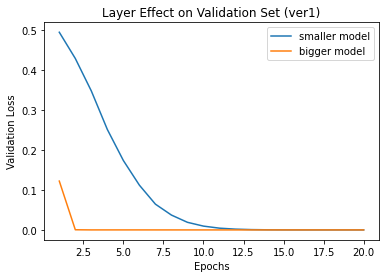

In [54]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_loss"]
val_loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

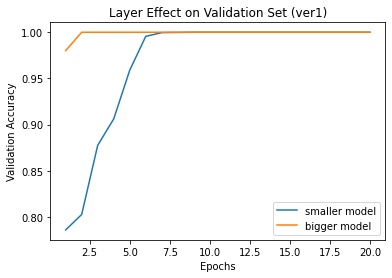

In [55]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_accuracy"]
val_acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [56]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_1 = model_h1n1_ver2_L1_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 1.8023 - accuracy: 0.8118 - val_loss: 1.2293 - val_accuracy: 0.9134
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7436 - accuracy: 0.9908 - val_loss: 0.4463 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5308 - accuracy: 0.9615 - val_loss: 0.2665 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2099 - accuracy: 1.0000 - val_loss: 0.1476 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.3367 - accuracy: 0.9540 - val_loss: 0.1089 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0968 - accuracy: 1.0000 - val_loss: 0.0849 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2027 - accuracy: 0.9709 - val_loss: 0.0782 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

**layer 8개 + L1 regularization 2개**

In [57]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_2 = model_h1n1_ver2_L1_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 1.9888 - accuracy: 0.7973 - val_loss: 1.2939 - val_accuracy: 0.9327
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.9278 - accuracy: 0.9695 - val_loss: 0.5749 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5989 - accuracy: 0.9795 - val_loss: 0.2916 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 1.0000 - val_loss: 0.1995 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.9949 - val_loss: 0.1364 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.9764 - val_loss: 0.1169 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1018 - accuracy: 1.0000 - val_loss: 0.0906 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 1개**

In [58]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_1 = model_h1n1_ver2_L2_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.5054 - accuracy: 0.8349 - val_loss: 0.2474 - val_accuracy: 0.9750
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1730 - accuracy: 0.9892 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0523 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2992 - accuracy: 0.9580 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1224 - accuracy: 0.9951 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

**layer 8개 + L2 regularization 2개**

In [59]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_2 = model_h1n1_ver2_L2_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5645 - accuracy: 0.7884 - val_loss: 0.4247 - val_accuracy: 0.8431
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1429 - accuracy: 0.9823 - val_loss: 0.0711 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.9738 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.9688 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

**layer 8개 + L1&L2 regularization 1개**

In [60]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L12 = model_h1n1_ver2_L12.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 19ms/step - loss: 2.0455 - accuracy: 0.8327 - val_loss: 1.3411 - val_accuracy: 0.9333
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.9011 - accuracy: 0.9962 - val_loss: 0.5756 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4537 - accuracy: 0.9950 - val_loss: 0.2733 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 15ms/step - loss: 0.3900 - accuracy: 0.9749 - val_loss: 0.2046 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 12ms/step - loss: 0.2428 - accuracy: 0.9882 - val_loss: 0.1810 - val_accuracy: 0.9998
Epoch 6/20
39/39 [==============================] - 0s 12ms/step - loss: 0.1431 - accuracy: 1.0000 - val_loss: 0.1227 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.1637 - accuracy: 0.9941 - val_loss: 0.1003 - val_accuracy: 1.0000
Epoch 8/20
39/

### visualize

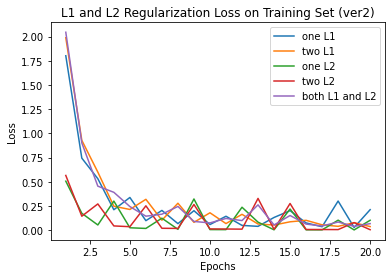

In [61]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_L1_1 = history_h1n1_ver2_L1_1.history
history_dict_h1n1_ver2_L1_2 = history_h1n1_ver2_L1_2.history
history_dict_h1n1_ver2_L2_1 = history_h1n1_ver2_L2_1.history
history_dict_h1n1_ver2_L2_2 = history_h1n1_ver2_L2_2.history
history_dict_h1n1_ver2_L12 = history_h1n1_ver2_L12.history

loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["loss"]
loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["loss"]
loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["loss"]
loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["loss"]
loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

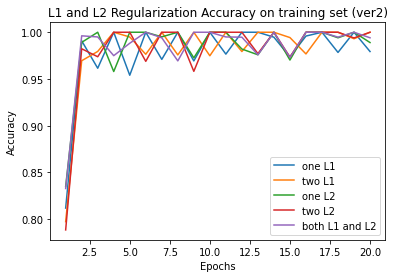

In [62]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["accuracy"]
acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["accuracy"]
acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["accuracy"]
acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["accuracy"]
acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver2_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

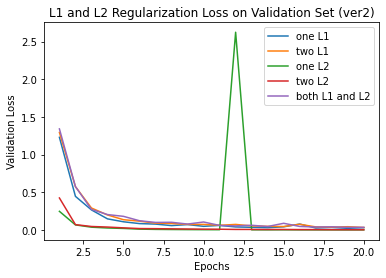

In [63]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_loss"]
val_loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_loss"]
val_loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_loss"]
val_loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_loss"]
val_loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

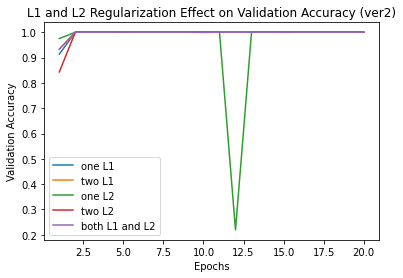

In [64]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_accuracy"]
val_acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_accuracy"]
val_acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_accuracy"]
val_acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_accuracy"]
val_acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Effect on Validation Accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [65]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_one = model_h1n1_ver2_one.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 17ms/step - loss: 1.0332 - accuracy: 0.8180 - val_loss: 0.6224 - val_accuracy: 0.9080
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.3987 - accuracy: 0.9809 - val_loss: 0.2279 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.2480 - accuracy: 0.9871 - val_loss: 0.1271 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.1081 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 10ms/step - loss: 0.1271 - accuracy: 0.9944 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.0974 - accuracy: 0.9944 - val_loss: 0.0413 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 8/20
39/39 [

**0.002**

In [66]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_two = model_h1n1_ver2_two.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6718 - accuracy: 0.8161 - val_loss: 0.4482 - val_accuracy: 0.8693
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2594 - accuracy: 0.9589 - val_loss: 0.1244 - val_accuracy: 0.9994
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0986 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.9801 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1289 - accuracy: 0.9851 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

**0.001(original)**

In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_three = model_h1n1_ver2_three.fit(x_train_h1n1_ver2,
                                                     y_train_h1n1_ver2,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 18ms/step - loss: 0.5480 - accuracy: 0.8014 - val_loss: 0.2983 - val_accuracy: 0.9140
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2515 - accuracy: 0.9674 - val_loss: 2.5961 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1525 - accuracy: 0.9938 - val_loss: 0.0593 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.9539 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

**0.0005**

In [68]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_four = model_h1n1_ver2_four.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.4500 - accuracy: 0.8496 - val_loss: 0.1612 - val_accuracy: 0.9936
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.0681 - accuracy: 0.9990 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2764 - accuracy: 0.9836 - val_loss: 1.4476 - val_accuracy: 0.4062
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0895 - accuracy: 0.9779 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.1958 - accuracy: 0.9664 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

**0.0001**

In [69]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_five = model_h1n1_ver2_five.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.4077 - accuracy: 0.8529 - val_loss: 0.0922 - val_accuracy: 0.9948
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.9801 - val_loss: 0.0134 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2078 - accuracy: 0.9708 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.3041 - accuracy: 0.9613 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

### visualize

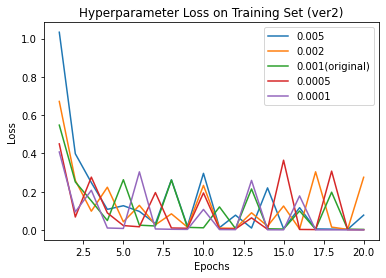

In [70]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_one = history_h1n1_ver2_one.history
history_dict_h1n1_ver2_two = history_h1n1_ver2_two.history
history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_four = history_h1n1_ver2_four.history
history_dict_h1n1_ver2_five = history_h1n1_ver2_five.history

loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["loss"]
loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["loss"]
loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["loss"]
loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

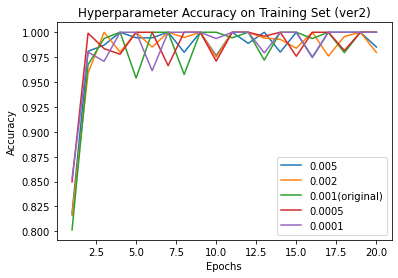

In [71]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["accuracy"]
acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["accuracy"]
acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["accuracy"]
acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["accuracy"]
acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver2_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

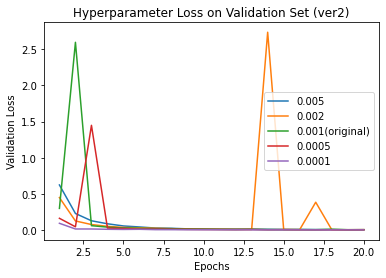

In [72]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_loss"]
val_loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_loss"]
val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_loss"]
val_loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

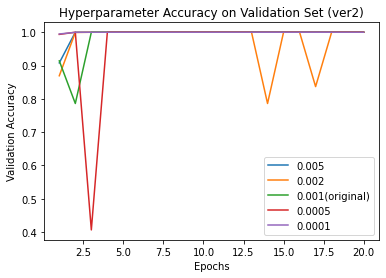

In [73]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_accuracy"]
val_acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_accuracy"]
val_acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_accuracy"]
val_acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_accuracy"]
val_acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [74]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_onedr = model_h1n1_ver2_onedr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.5084 - accuracy: 0.8478 - val_loss: 0.1817 - val_accuracy: 0.9950
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.1719 - accuracy: 0.9780 - val_loss: 0.0827 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2860 - accuracy: 0.9791 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0507 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.9785 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2067 - accuracy: 0.9797 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

**# dropout = 2**

In [75]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr = model_h1n1_ver2_twodr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.5600 - accuracy: 0.8152 - val_loss: 0.2154 - val_accuracy: 0.9801
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.1194 - accuracy: 0.9969 - val_loss: 0.0742 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.1889 - accuracy: 0.9842 - val_loss: 0.0539 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2516 - accuracy: 0.9774 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0289 - accuracy: 0.9999 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

**# dropout = 3**

In [76]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_threedr = model_h1n1_ver2_threedr.fit(x_train_h1n1_ver2,
                                                        y_train_h1n1_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 22ms/step - loss: 0.5934 - accuracy: 0.7799 - val_loss: 0.3903 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 12ms/step - loss: 0.3022 - accuracy: 0.8851 - val_loss: 0.2207 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 11ms/step - loss: 0.2689 - accuracy: 0.9426 - val_loss: 0.1430 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 11ms/step - loss: 0.1216 - accuracy: 0.9905 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 10ms/step - loss: 0.1873 - accuracy: 0.9764 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0577 - accuracy: 0.9978 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.2213 - accuracy: 0.9884 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 8/20
39/

### visualize

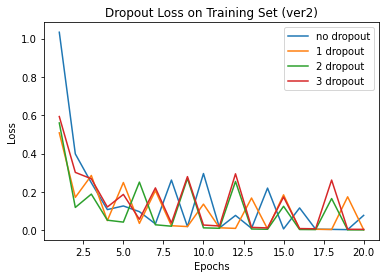

In [77]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_onedr = history_h1n1_ver2_onedr.history
history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history
history_dict_h1n1_ver2_threedr = history_h1n1_ver2_threedr.history


loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["loss"]
loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]
loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

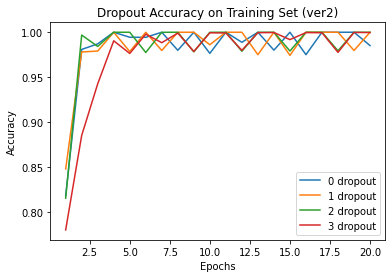

In [78]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["accuracy"]
acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]
acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

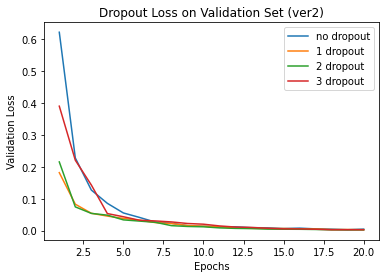

In [79]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_loss"]
val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]
val_loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

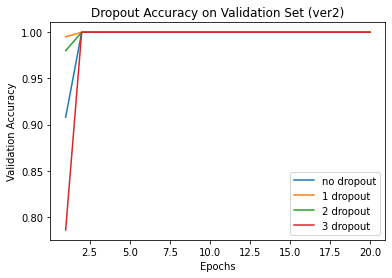

In [80]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]
val_acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Seasonal Model.ver1

In [81]:
train_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver1.csv')

In [82]:
print(train_seasonal_ver1.shape)
train_seasonal_ver1.head()

(25026, 22)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,4.0,2,1,2,1,2,0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1,1,2,9,2,2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4.0,1.0,5,1,1,5,3,0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4.0,3,1,1,9,2,1.0,0.0,0


In [83]:
train_seasonal_ver1.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'sex', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'seasonal_vaccine'],
      dtype='object')

In [84]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver1.iloc[:,1:-1]
target = train_seasonal_ver1['seasonal_vaccine']

x_train_seasonal_ver1, x_valid_seasonal_ver1, y_train_seasonal_ver1, y_valid_seasonal_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [85]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_s = model_seasonal_ver1_s.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6724 - accuracy: 0.5894 - val_loss: 0.6422 - val_accuracy: 0.6362
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6659 - val_loss: 0.6041 - val_accuracy: 0.6902
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.7031 - val_loss: 0.5841 - val_accuracy: 0.6974
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7174 - val_loss: 0.5651 - val_accuracy: 0.7147
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5522 - accuracy: 0.7236 - val_loss: 0.5601 - val_accuracy: 0.7231
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.7295 - val_loss: 0.5714 - val_accuracy: 0.7091
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5426 - accuracy: 0.7308 - val_loss: 0.5541 - val_accuracy: 0.7279
Epoch 8/20
40/40 [==

**layer 8개**


In [86]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_b = model_seasonal_ver1_b.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.6214 - accuracy: 0.6620 - val_loss: 0.6335 - val_accuracy: 0.6600
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.7171 - val_loss: 0.5781 - val_accuracy: 0.7211
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7275 - val_loss: 0.5643 - val_accuracy: 0.7183
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5428 - accuracy: 0.7299 - val_loss: 0.6151 - val_accuracy: 0.6910
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5414 - accuracy: 0.7335 - val_loss: 0.5500 - val_accuracy: 0.7249
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5371 - accuracy: 0.7349 - val_loss: 0.5690 - val_accuracy: 0.7080
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5333 - accuracy: 0.7387 - val_loss: 0.5611 - val_accuracy: 0.7058
Epoch 8/20
40/40 [==

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [87]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_1 = model_seasonal_ver1_L1_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 1.9644 - accuracy: 0.6700 - val_loss: 1.4561 - val_accuracy: 0.7058
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.1507 - accuracy: 0.7163 - val_loss: 0.8968 - val_accuracy: 0.7113
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7524 - accuracy: 0.7237 - val_loss: 0.7010 - val_accuracy: 0.7074
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.7303 - val_loss: 0.6314 - val_accuracy: 0.7291
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6067 - accuracy: 0.7315 - val_loss: 0.6217 - val_accuracy: 0.7064
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5900 - accuracy: 0.7341 - val_loss: 0.6307 - val_accuracy: 0.7052
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5766 - accuracy: 0.7394 - val_loss: 0.5886 - val_accuracy: 0.7341
Epoch 8/20
40/40 [=

**layer 8개 + L1 regularization 2개**

In [88]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_2 = model_seasonal_ver1_L1_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 2.1214 - accuracy: 0.6552 - val_loss: 1.6017 - val_accuracy: 0.7080
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.3035 - accuracy: 0.7158 - val_loss: 1.0677 - val_accuracy: 0.6822
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.8789 - accuracy: 0.7224 - val_loss: 0.7845 - val_accuracy: 0.7022
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7177 - accuracy: 0.7266 - val_loss: 0.6907 - val_accuracy: 0.7205
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.7325 - val_loss: 0.6965 - val_accuracy: 0.6916
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6221 - accuracy: 0.7361 - val_loss: 0.6180 - val_accuracy: 0.7377
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6018 - accuracy: 0.7342 - val_loss: 0.6029 - val_accuracy: 0.7355
Epoch 8/20
40/40 [==

**layer 8개 + L2 regularization 1개**

In [89]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_1 = model_seasonal_ver1_L2_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 9ms/step - loss: 0.7367 - accuracy: 0.6553 - val_loss: 0.7589 - val_accuracy: 0.6734
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.7194 - val_loss: 0.6241 - val_accuracy: 0.6994
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5873 - accuracy: 0.7256 - val_loss: 0.5947 - val_accuracy: 0.7085
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5690 - accuracy: 0.7314 - val_loss: 0.5769 - val_accuracy: 0.7173
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5568 - accuracy: 0.7350 - val_loss: 0.5710 - val_accuracy: 0.7303
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5524 - accuracy: 0.7368 - val_loss: 0.5855 - val_accuracy: 0.7135
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.7410 - val_loss: 0.5947 - val_accuracy: 0.7153
Epoch 8/20
40/40 [==

**layer 8개 + L2 regularization 2개**

In [90]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_2 = model_seasonal_ver1_L2_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 11ms/step - loss: 0.7482 - accuracy: 0.6691 - val_loss: 0.6860 - val_accuracy: 0.6964
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6408 - accuracy: 0.7206 - val_loss: 0.6277 - val_accuracy: 0.7169
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6071 - accuracy: 0.7245 - val_loss: 0.5942 - val_accuracy: 0.7263
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5820 - accuracy: 0.7304 - val_loss: 0.5994 - val_accuracy: 0.7303
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5704 - accuracy: 0.7339 - val_loss: 0.5867 - val_accuracy: 0.7293
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5572 - accuracy: 0.7392 - val_loss: 0.5973 - val_accuracy: 0.7189
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7400 - val_loss: 0.6140 - val_accuracy: 0.6854
Epoch 8/20
40/40 [=

**layer 8개 + L1&L2 regularization 1개**

In [91]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L12 = model_seasonal_ver1_L12.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 2.2205 - accuracy: 0.6599 - val_loss: 1.6521 - val_accuracy: 0.7084
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.3043 - accuracy: 0.7202 - val_loss: 1.0357 - val_accuracy: 0.7199
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.8580 - accuracy: 0.7235 - val_loss: 0.8266 - val_accuracy: 0.6890
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7106 - accuracy: 0.7259 - val_loss: 0.6969 - val_accuracy: 0.7245
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.7315 - val_loss: 0.6457 - val_accuracy: 0.7279
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6252 - accuracy: 0.7341 - val_loss: 0.6340 - val_accuracy: 0.7301
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6081 - accuracy: 0.7381 - val_loss: 0.6311 - val_accuracy: 0.7311
Epoch 8/20
40/40 [=

### visualize

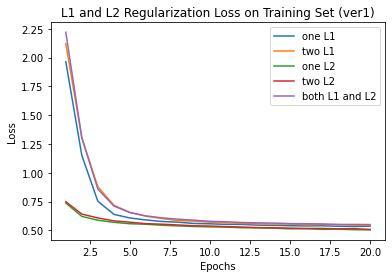

In [92]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_L1_1 = history_seasonal_ver1_L1_1.history
history_dict_seasonal_ver1_L1_2 = history_seasonal_ver1_L1_2.history
history_dict_seasonal_ver1_L2_1 = history_seasonal_ver1_L2_1.history
history_dict_seasonal_ver1_L2_2 = history_seasonal_ver1_L2_2.history
history_dict_seasonal_ver1_L12 = history_seasonal_ver1_L12.history

loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["loss"]
loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["loss"]
loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["loss"]
loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["loss"]
loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

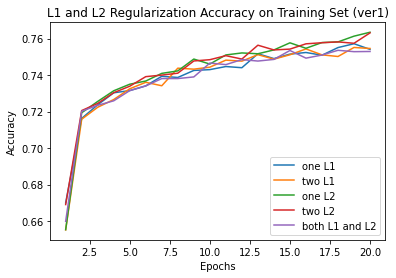

In [93]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["accuracy"]
acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["accuracy"]
acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["accuracy"]
acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["accuracy"]
acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

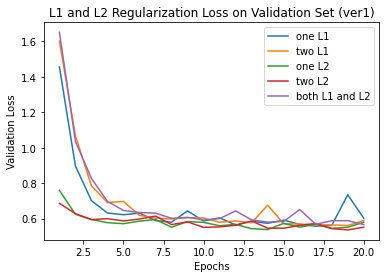

In [94]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_loss"]
val_loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_loss"]
val_loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_loss"]
val_loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_loss"]
val_loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

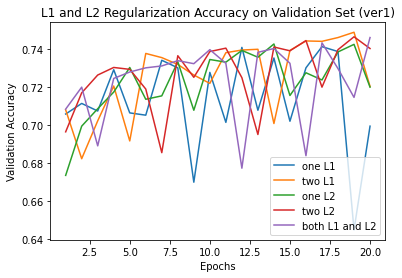

In [95]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_accuracy"]
val_acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_accuracy"]
val_acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_accuracy"]
val_acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_accuracy"]
val_acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [96]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_one = model_seasonal_ver1_one.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 1.2108 - accuracy: 0.6677 - val_loss: 0.9888 - val_accuracy: 0.6766
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.8250 - accuracy: 0.7167 - val_loss: 0.7247 - val_accuracy: 0.7271
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.7278 - val_loss: 0.6817 - val_accuracy: 0.7157
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.7305 - val_loss: 0.6206 - val_accuracy: 0.7123
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.7294 - val_loss: 0.6083 - val_accuracy: 0.6952
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7375 - val_loss: 0.5807 - val_accuracy: 0.7165
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5557 - accuracy: 0.7388 - val_loss: 0.5729 - val_accuracy: 0.7281
Epoch 8/20
40/40 [==

**0.002**

In [97]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_two = model_seasonal_ver1_two.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.8989 - accuracy: 0.6418 - val_loss: 0.7802 - val_accuracy: 0.7048
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.7148 - val_loss: 0.7012 - val_accuracy: 0.6860
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6366 - accuracy: 0.7278 - val_loss: 0.6254 - val_accuracy: 0.7153
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5993 - accuracy: 0.7292 - val_loss: 0.5994 - val_accuracy: 0.7201
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5810 - accuracy: 0.7322 - val_loss: 0.5906 - val_accuracy: 0.7281
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5650 - accuracy: 0.7361 - val_loss: 0.5694 - val_accuracy: 0.7341
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5553 - accuracy: 0.7380 - val_loss: 0.5708 - val_accuracy: 0.7337
Epoch 8/20
40/40 [=

**0.001(original)**

In [98]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_three = model_seasonal_ver1_three.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.7707 - accuracy: 0.6653 - val_loss: 0.6870 - val_accuracy: 0.7175
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6491 - accuracy: 0.7190 - val_loss: 0.6708 - val_accuracy: 0.6700
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6135 - accuracy: 0.7240 - val_loss: 0.7316 - val_accuracy: 0.6324
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5914 - accuracy: 0.7288 - val_loss: 0.6088 - val_accuracy: 0.7179
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5755 - accuracy: 0.7362 - val_loss: 0.6032 - val_accuracy: 0.7006
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5646 - accuracy: 0.7368 - val_loss: 0.5906 - val_accuracy: 0.7285
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5540 - accuracy: 0.7399 - val_loss: 0.5915 - val_accuracy: 0.7020
Epoch 8/20
40/40 [=

**0.0005**

In [99]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_four = model_seasonal_ver1_four.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.7196 - accuracy: 0.6422 - val_loss: 0.6804 - val_accuracy: 0.7000
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.7126 - val_loss: 0.6729 - val_accuracy: 0.6446
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6263 - accuracy: 0.7183 - val_loss: 0.6354 - val_accuracy: 0.7229
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6083 - accuracy: 0.7274 - val_loss: 0.6167 - val_accuracy: 0.7076
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5939 - accuracy: 0.7336 - val_loss: 0.6488 - val_accuracy: 0.7103
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5859 - accuracy: 0.7302 - val_loss: 0.5850 - val_accuracy: 0.7351
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5742 - accuracy: 0.7351 - val_loss: 0.5964 - val_accuracy: 0.6920
Epoch 8/20
40/40 [=

**0.0001**

In [100]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_five = model_seasonal_ver1_five.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.6219 - accuracy: 0.6746 - val_loss: 0.6396 - val_accuracy: 0.6452
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5747 - accuracy: 0.7155 - val_loss: 0.5767 - val_accuracy: 0.7179
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5619 - accuracy: 0.7237 - val_loss: 0.5761 - val_accuracy: 0.7171
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5534 - accuracy: 0.7294 - val_loss: 0.5735 - val_accuracy: 0.7091
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5468 - accuracy: 0.7345 - val_loss: 0.5780 - val_accuracy: 0.7247
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5420 - accuracy: 0.7381 - val_loss: 0.5745 - val_accuracy: 0.7149
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5391 - accuracy: 0.7389 - val_loss: 0.5598 - val_accuracy: 0.7343
Epoch 8/20
40/40 [=

### visualize

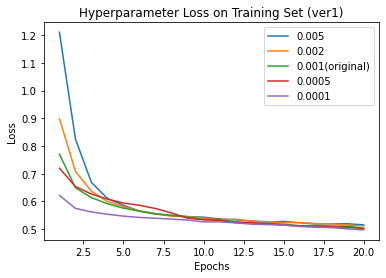

In [101]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_one = history_seasonal_ver1_one.history
history_dict_seasonal_ver1_two = history_seasonal_ver1_two.history
history_dict_seasonal_ver1_three = history_seasonal_ver1_three.history
history_dict_seasonal_ver1_four = history_seasonal_ver1_four.history
history_dict_seasonal_ver1_five = history_seasonal_ver1_five.history

loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["loss"]
loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["loss"]
loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["loss"]
loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["loss"]
loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

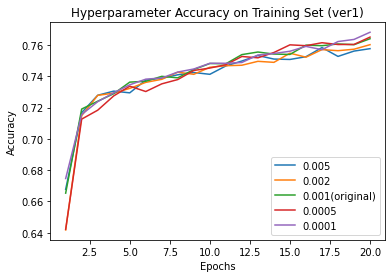

In [102]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["accuracy"]
acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["accuracy"]
acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["accuracy"]
acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["accuracy"]
acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

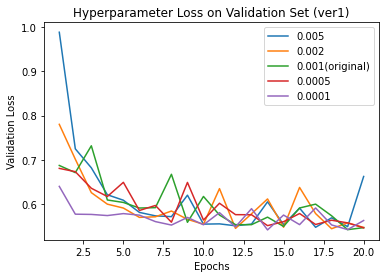

In [103]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_loss"]
val_loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_loss"]
val_loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_loss"]
val_loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_loss"]
val_loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

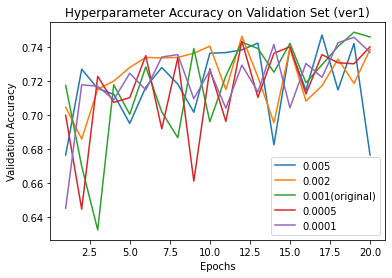

In [104]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_accuracy"]
val_acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_accuracy"]
val_acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_accuracy"]
val_acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_accuracy"]
val_acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [105]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_onedr = model_seasonal_ver1_onedr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.7519 - accuracy: 0.6604 - val_loss: 0.6774 - val_accuracy: 0.6886
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6443 - accuracy: 0.7167 - val_loss: 0.6437 - val_accuracy: 0.6928
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6074 - accuracy: 0.7267 - val_loss: 0.6225 - val_accuracy: 0.7020
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5883 - accuracy: 0.7302 - val_loss: 0.6011 - val_accuracy: 0.7107
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5750 - accuracy: 0.7318 - val_loss: 0.5833 - val_accuracy: 0.7305
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7368 - val_loss: 0.5792 - val_accuracy: 0.7187
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5572 - accuracy: 0.7364 - val_loss: 0.5653 - val_accuracy: 0.7329
Epoch 8/20
40/40 [==

**# dropout = 2**

In [106]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_twodr = model_seasonal_ver1_twodr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.7571 - accuracy: 0.6639 - val_loss: 0.7112 - val_accuracy: 0.6452
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6557 - accuracy: 0.7185 - val_loss: 0.6389 - val_accuracy: 0.7129
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 0.7248 - val_loss: 0.6202 - val_accuracy: 0.7267
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5968 - accuracy: 0.7314 - val_loss: 0.5871 - val_accuracy: 0.7253
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5833 - accuracy: 0.7314 - val_loss: 0.6089 - val_accuracy: 0.7273
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5717 - accuracy: 0.7337 - val_loss: 0.6083 - val_accuracy: 0.7177
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5665 - accuracy: 0.7348 - val_loss: 0.5636 - val_accuracy: 0.7367
Epoch 8/20
40/40 [=

**# dropout = 3**

In [107]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_threedr = model_seasonal_ver1_threedr.fit(x_train_seasonal_ver1,
                                                                y_train_seasonal_ver1,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 10ms/step - loss: 0.7987 - accuracy: 0.5903 - val_loss: 0.6885 - val_accuracy: 0.7193
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.6902 - val_loss: 0.6247 - val_accuracy: 0.7173
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6479 - accuracy: 0.7098 - val_loss: 0.6127 - val_accuracy: 0.7169
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.7208 - val_loss: 0.5912 - val_accuracy: 0.7253
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6025 - accuracy: 0.7240 - val_loss: 0.5779 - val_accuracy: 0.7261
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5850 - accuracy: 0.7318 - val_loss: 0.5676 - val_accuracy: 0.7325
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5801 - accuracy: 0.7352 - val_loss: 0.6001 - val_accuracy: 0.6892
Epoch 8/20
40/40 [=

### visualize

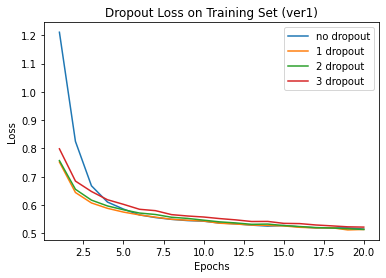

In [108]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver1_onedr = history_seasonal_ver1_onedr.history
history_dict_seasonal_ver1_twodr = history_seasonal_ver1_twodr.history
history_dict_seasonal_ver1_threedr = history_seasonal_ver1_threedr.history


loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["loss"]
loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["loss"]
loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

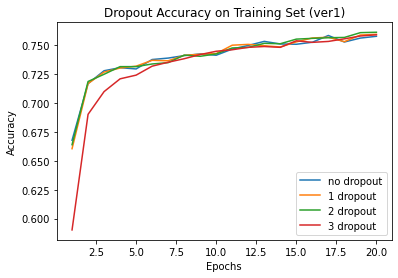

In [109]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["accuracy"]
acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["accuracy"]
acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

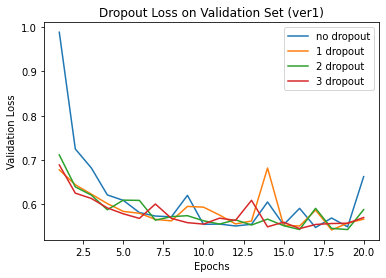

In [110]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_loss"]
val_loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_loss"]
val_loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

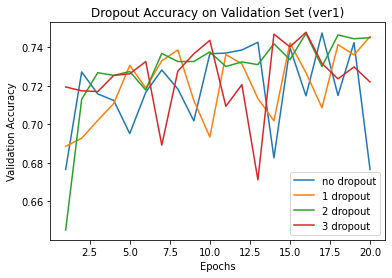

In [111]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_accuracy"]
val_acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_accuracy"]
val_acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# Seasonal Model.ver2

In [112]:
train_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver2.csv')

In [113]:
print(train_seasonal_ver2.shape)
train_seasonal_ver2.head()

(25026, 36)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [114]:
train_seasonal_ver2.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'seasonal_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [115]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver2.iloc[:,1:-1]
target = train_seasonal_ver2['seasonal_vaccine']

x_train_seasonal_ver2, x_valid_seasonal_ver2, y_train_seasonal_ver2, y_valid_seasonal_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [116]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_s = model_seasonal_ver2_s.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.7274 - accuracy: 0.5965 - val_loss: 0.5990 - val_accuracy: 0.6956
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5365 - accuracy: 0.7516 - val_loss: 0.4788 - val_accuracy: 0.7887
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4101 - accuracy: 0.8517 - val_loss: 0.3544 - val_accuracy: 0.8859
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2976 - accuracy: 0.9170 - val_loss: 0.2547 - val_accuracy: 0.9411
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1976 - accuracy: 0.9666 - val_loss: 0.1540 - val_accuracy: 0.9844
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.9926 - val_loss: 0.0857 - val_accuracy: 0.9972
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0624 - accuracy: 0.9990 - val_loss: 0.0494 - val_accuracy: 0.9994
Epoch 8/20
40/40 [==

**layer 8개**


In [117]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_b = model_seasonal_ver2_b.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.4744 - accuracy: 0.7673 - val_loss: 0.1117 - val_accuracy: 0.9754
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0698 - accuracy: 0.9797 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2966 - accuracy: 0.9873 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 4.3190e-04 - accuracy: 1.0000 - val_loss: 9.1064e-05 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 2.9178e-05 - accuracy: 1.0000 - val_loss: 1.3351e-05 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 3.4199e-06 - accuracy: 1.0000 - val_loss: 1.9425e-06 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 4.7454e-07 - accuracy: 1.0000 - val_loss: 3.8596e-07 - val_accur

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [118]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_1 = model_seasonal_ver2_L1_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 1.8467 - accuracy: 0.7747 - val_loss: 1.0927 - val_accuracy: 0.9882
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7454 - accuracy: 0.9983 - val_loss: 0.4570 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4155 - accuracy: 0.9863 - val_loss: 0.1887 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1534 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1710 - accuracy: 0.9851 - val_loss: 0.0761 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0612 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1671 - accuracy: 0.9712 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**layer 8개 + L1 regularization 2개**

In [119]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_2 = model_seasonal_ver2_L1_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 2.0363 - accuracy: 0.7469 - val_loss: 1.1988 - val_accuracy: 0.9806
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.0669 - accuracy: 0.9399 - val_loss: 0.6690 - val_accuracy: 0.9992
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5020 - accuracy: 1.0000 - val_loss: 0.3747 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.9716 - val_loss: 0.2854 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.9569 - val_loss: 0.2310 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1982 - accuracy: 1.0000 - val_loss: 0.1729 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9833 - val_loss: 0.1458 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**layer 8개 + L2 regularization 1개**

In [120]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_1 = model_seasonal_ver2_L2_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.5795 - accuracy: 0.7734 - val_loss: 0.6986 - val_accuracy: 0.7103
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1689 - accuracy: 0.9731 - val_loss: 0.4158 - val_accuracy: 0.8346
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0705 - accuracy: 0.9962 - val_loss: 0.0545 - val_accuracy: 0.9998
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0474 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1532 - accuracy: 0.9889 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.9751 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**layer 8개 + L2 regularization 2개**

In [121]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_2 = model_seasonal_ver2_L2_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.6205 - accuracy: 0.7796 - val_loss: 0.2173 - val_accuracy: 0.9934
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.1145 - accuracy: 0.9995 - val_loss: 0.0732 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.9647 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.2345 - accuracy: 0.9654 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**layer 8개 + L1&L2 regularization 1개**

In [122]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L12 = model_seasonal_ver2_L12.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 2.0968 - accuracy: 0.7779 - val_loss: 1.9430 - val_accuracy: 0.6344
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.0735 - accuracy: 0.9445 - val_loss: 0.6622 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5181 - accuracy: 1.0000 - val_loss: 0.3981 - val_accuracy: 0.9998
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4590 - accuracy: 0.9707 - val_loss: 0.2797 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2372 - accuracy: 1.0000 - val_loss: 0.1850 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.9597 - val_loss: 0.1533 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.9726 - val_loss: 0.1454 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

### visualize

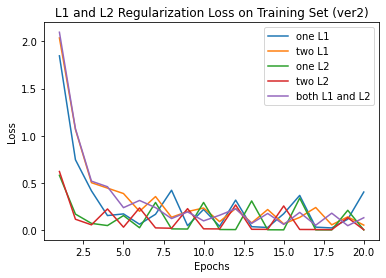

In [123]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_L1_1 = history_seasonal_ver2_L1_1.history
history_dict_seasonal_ver2_L1_2 = history_seasonal_ver2_L1_2.history
history_dict_seasonal_ver2_L2_1 = history_seasonal_ver2_L2_1.history
history_dict_seasonal_ver2_L2_2 = history_seasonal_ver2_L2_2.history
history_dict_seasonal_ver2_L12 = history_seasonal_ver2_L12.history

loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["loss"]
loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["loss"]
loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["loss"]
loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["loss"]
loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

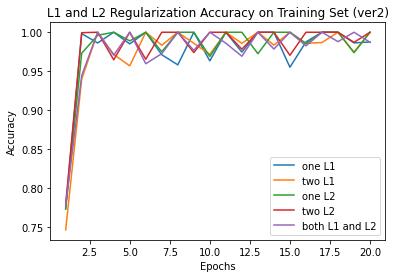

In [124]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["accuracy"]
acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["accuracy"]
acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["accuracy"]
acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["accuracy"]
acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

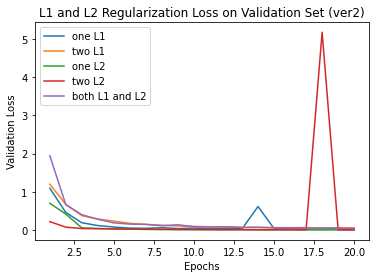

In [125]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_loss"]
val_loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_loss"]
val_loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_loss"]
val_loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_loss"]
val_loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

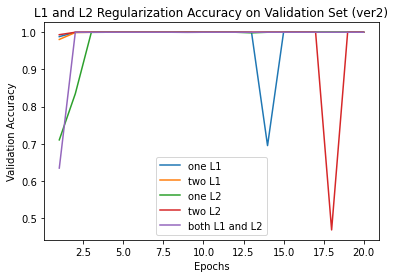

In [126]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_accuracy"]
val_acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_accuracy"]
val_acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_accuracy"]
val_acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_accuracy"]
val_acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [127]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_one = model_seasonal_ver2_one.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 1.0882 - accuracy: 0.7786 - val_loss: 0.8065 - val_accuracy: 0.8414
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.9776 - val_loss: 0.2493 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.9860 - val_loss: 0.1310 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1116 - accuracy: 1.0000 - val_loss: 0.0888 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2121 - accuracy: 0.9863 - val_loss: 0.0633 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1701 - accuracy: 0.9799 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**0.002**

In [128]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_two = model_seasonal_ver2_two.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.7177 - accuracy: 0.8033 - val_loss: 0.2695 - val_accuracy: 0.9960
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.3298 - accuracy: 0.9775 - val_loss: 0.1310 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 1.0000 - val_loss: 0.0630 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2172 - accuracy: 0.9758 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1854 - accuracy: 0.9667 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**0.001(original)**

In [129]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_three = model_seasonal_ver2_three.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.6848 - accuracy: 0.7426 - val_loss: 0.5024 - val_accuracy: 0.8418
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5500 - accuracy: 0.9631 - val_loss: 0.1877 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3532 - accuracy: 0.9729 - val_loss: 0.0840 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0698 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4228 - accuracy: 0.9656 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**0.0005**

In [130]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_four = model_seasonal_ver2_four.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 11ms/step - loss: 0.5051 - accuracy: 0.7919 - val_loss: 0.4913 - val_accuracy: 0.7739
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1100 - accuracy: 0.9811 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2110 - accuracy: 0.9724 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9964
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.2990 - accuracy: 0.9605 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**0.0001**

In [131]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_five = model_seasonal_ver2_five.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.4497 - accuracy: 0.7907 - val_loss: 0.0592 - val_accuracy: 0.9974
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9997 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2942 - accuracy: 0.9877 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.2872 - accuracy: 0.9667 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

### visualize

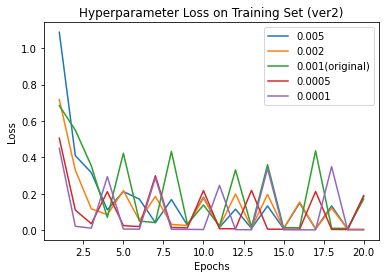

In [132]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_one = history_seasonal_ver2_one.history
history_dict_seasonal_ver2_two = history_seasonal_ver2_two.history
history_dict_seasonal_ver2_three = history_seasonal_ver2_three.history
history_dict_seasonal_ver2_four = history_seasonal_ver2_four.history
history_dict_seasonal_ver2_five = history_seasonal_ver2_five.history

loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["loss"]
loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["loss"]
loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["loss"]
loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["loss"]
loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

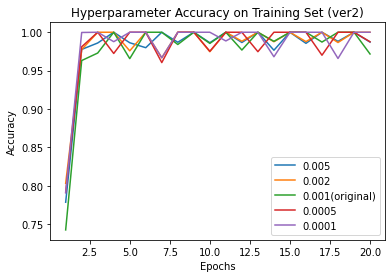

In [133]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["accuracy"]
acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["accuracy"]
acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["accuracy"]
acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["accuracy"]
acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

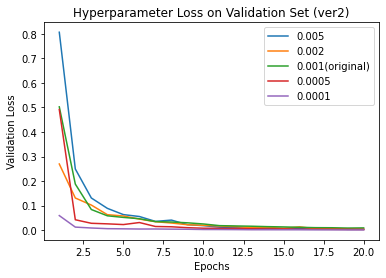

In [134]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_loss"]
val_loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_loss"]
val_loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_loss"]
val_loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_loss"]
val_loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

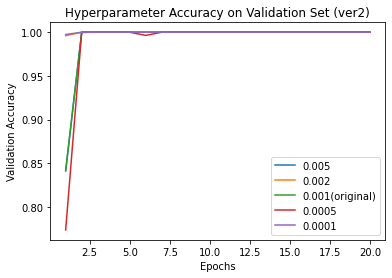

In [135]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_accuracy"]
val_acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_accuracy"]
val_acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_accuracy"]
val_acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_accuracy"]
val_acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [136]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_onedr = model_seasonal_ver2_onedr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 11ms/step - loss: 0.5835 - accuracy: 0.8096 - val_loss: 0.1568 - val_accuracy: 0.9966
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1383 - accuracy: 0.9934 - val_loss: 0.1125 - val_accuracy: 0.9960
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0812 - accuracy: 0.9998 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.9751 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**# dropout = 2**

In [137]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_twodr = model_seasonal_ver2_twodr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 11ms/step - loss: 0.6486 - accuracy: 0.7505 - val_loss: 1.0040 - val_accuracy: 0.6370
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9851 - val_loss: 0.0789 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.2061 - accuracy: 0.9838 - val_loss: 0.0662 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.2080 - accuracy: 0.9881 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0393 - accuracy: 1.0000 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2152 - accuracy: 0.9872 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**# dropout = 3**

In [138]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_threedr = model_seasonal_ver2_threedr.fit(x_train_seasonal_ver2,
                                                                y_train_seasonal_ver2,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 11ms/step - loss: 0.7011 - accuracy: 0.6935 - val_loss: 0.5633 - val_accuracy: 0.7401
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.9309 - val_loss: 0.0929 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9918 - val_loss: 0.0704 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.9773 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0720 - accuracy: 0.9959 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.9810 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0529 - accuracy: 0.9970 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

### visualize

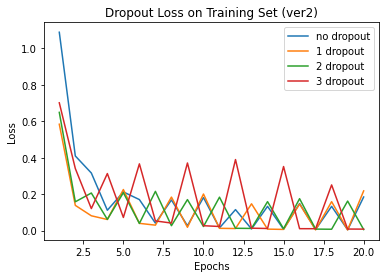

In [139]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver2_onedr = history_seasonal_ver2_onedr.history
history_dict_seasonal_ver2_twodr = history_seasonal_ver2_twodr.history
history_dict_seasonal_ver2_threedr = history_seasonal_ver2_threedr.history


loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["loss"]
loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["loss"]
loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

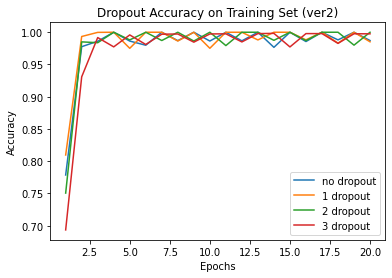

In [140]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["accuracy"]
acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["accuracy"]
acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

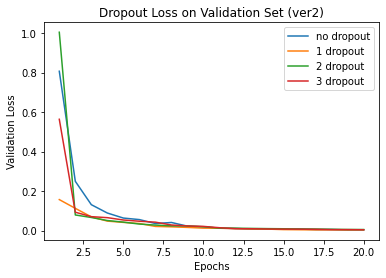

In [141]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_loss"]
val_loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_loss"]
val_loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

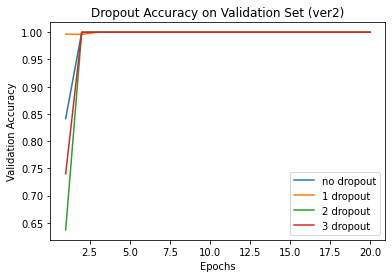

In [142]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_accuracy"]
val_acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_accuracy"]
val_acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# Prediction

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
sub_frmt = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/submission_format.csv')

In [152]:
sub_frmt.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


#### Predict ver1

**h1n1_vaccine**

In [145]:
test_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver1.csv')

In [146]:
test_h1n1_ver1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,4.0,2.0,4,1,2,5,1,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,5,1,1,5,2,1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,5.0,2.0,4.0,2,2,1,6,1,0.0,1.0


In [147]:
test_h1n1_ver1 = test_h1n1_ver1.drop(['respondent_id'], axis = 1)
test_h1n1_ver1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,5.0,4.0,2.0,4,1,2,5,1,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,5,1,1,5,2,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,5.0,2.0,4.0,2,2,1,6,1,0.0,1.0


In [149]:
pred_h1n1_ver1 = model_h1n1_ver1_twodr.predict(test_h1n1_ver1)

In [150]:
pred_h1n1_ver1

array([[0.03759486],
       [0.05947109],
       [0.54631424],
       ...,
       [0.12065512],
       [0.09643007],
       [0.08771606]], dtype=float32)

In [153]:
sub_frmt['h1n1_vaccine'] = pred_h1n1_ver1

**seasonal_vaccine**

In [154]:
test_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver1.csv')

In [155]:
test_seasonal_ver1.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.0,4.0,4.0,4,1,2,5,1,1.0,0.0
3,26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,2.0,5,1,1,5,2,1.0,0.0
4,26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,4.0,4.0,2.0,2,2,1,6,1,0.0,1.0


In [156]:
test_seasonal_ver1 = test_seasonal_ver1.drop(['respondent_id'], axis = 1)
test_seasonal_ver1.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4,1,2,5,1,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,2.0,5,1,1,5,2,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,2,2,1,6,1,0.0,1.0


In [157]:
pred_seasonal_ver1 = model_seasonal_ver1_twodr.predict(test_seasonal_ver1)

In [158]:
pred_seasonal_ver1

array([[0.04043021],
       [0.02420336],
       [0.82278574],
       ...,
       [0.0987978 ],
       [0.67354965],
       [0.8356609 ]], dtype=float32)

In [159]:
sub_frmt['seasonal_vaccine'] = pred_seasonal_ver1

**submission_ver1**

In [160]:
submission_ver1 = sub_frmt[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [161]:
submission_ver1.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.037595,0.040430
1,26708,0.059471,0.024203
2,26709,0.546314,0.822786
3,26710,0.161755,0.844859
4,26711,0.265642,0.816532


In [162]:
submission_ver1.to_csv('submission_ver1.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver21.csv' 파일을 다운받으면 됨.

#### Predict ver2

**h1n1_vaccine**

In [163]:
test_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver2.csv')

In [164]:
test_h1n1_ver2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [165]:
test_h1n1_ver2 = test_h1n1_ver2.drop(['respondent_id'], axis = 1)
test_h1n1_ver2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [166]:
pred_h1n1_ver2 = model_h1n1_ver2_twodr.predict(test_h1n1_ver2)

In [167]:
pred_h1n1_ver2

array([[7.0845712e-09],
       [9.9999404e-01],
       [9.9999988e-01],
       ...,
       [9.9999797e-01],
       [9.9999809e-01],
       [9.9999821e-01]], dtype=float32)

In [168]:
sub_frmt['h1n1_vaccine'] = pred_h1n1_ver2

**seasonal_vaccine**

In [169]:
test_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver2.csv')

In [170]:
test_seasonal_ver2.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [171]:
test_seasonal_ver2 = test_seasonal_ver2.drop(['respondent_id'], axis = 1)
test_seasonal_ver2.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [172]:
pred_seasonal_ver2 = model_seasonal_ver2_twodr.predict(test_seasonal_ver2)

In [173]:
pred_seasonal_ver2

array([[9.7809982e-07],
       [9.9999654e-01],
       [9.9999988e-01],
       ...,
       [9.9999785e-01],
       [9.9999988e-01],
       [9.9999976e-01]], dtype=float32)

In [174]:
sub_frmt['seasonal_vaccine'] = pred_seasonal_ver2

**submission_ver2**

In [175]:
submission_ver2 = sub_frmt[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [176]:
submission_ver2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,7.084571e-09,9.780998e-07
1,26708,9.999940e-01,9.999965e-01
2,26709,9.999999e-01,9.999999e-01
3,26710,9.999993e-01,9.999999e-01
4,26711,1.949326e-09,3.913691e-07


In [177]:
submission_ver2.to_csv('submission_ver2.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver2.csv' 파일을 다운받으면 됨.

# +) Things to consider

In [ ]:
## [참고]
## 모델 성능을 올리기 위한 방법 중 하나 : 배치 정규화
## 값이 활성화 함수를 통과하기 전에 가중의 변화를 줄이는 것
## https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-%EC%8B%A0%EA%B2%BD%EB%A7%9D-%ED%95%99%EC%8A%B5%EC%9D%98-%ED%9A%A8%EC%9C%A8%EA%B3%BC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%98%AC%EB%A6%AC%EA%B8%B0

## layers에서 사용할 수 없는 메소드여서 적용은 못 해봤어요 ㅠㅅㅠ


class BatchNormalization :

  def __init__(self, gamma, beta, momentum = 0.9, running_mean = None, running_var = None) :
    self.gamma = gamma
    self. beta = beta
    self.momentum = momentum
    self.input_shape = None

    # 테스트에서 사용할 평균과 분산
    self.running_mean = running_mean
    self.running_var = running_var

    # backward시 사용할 중간 데이터
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None

    def forward(self, x, train_flg = True) :
      self.input_shape = x.shape
      if x.ndim != 2 :
        N, C, H, W = x.shape
        x = x.reshape(N, -1)

      out = self.__forward(x, train_flg)

      return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg) :
      if self.running_mean is None :
        N, D = x.shape
        self.running_mean = np.zeros(D)
        self.runnng_var = np.zeros(D)

      if train_flg :
        mu = x.mean(axis = 0)
        xc = x - mu
        var = np.mean(xc * 2, axis = 0)
        std = np.sqrt(var + 10e-7)
        xn = xc / std

        self.batch_size = x.shape[0]
        self.xc = xc
        self.xn = xn
        self.std = std
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
      else :
        xc = x - self.running_mean
        xn = xc / ((np.sqrt(self.running_var + 10e-7)))

      out = self.gamma * xn + self. beta
      return out

    def backward(self, dout) :
      if dout.ndim != 2 :
        N, C, H, W = dout.shape
        dout = dout.reshape(N,-1)

      dx = self.__backward(dout)
      dx = dx.reshape(*self.input_shape)
      return dx

    def __backward(self, dout) :
      dbeta = dout.sum(axis = 0)
      dgamma = np.sum(self.xn * dout, axis = 0)
      dxn = self.gamma * dout
      dxc = dxn / self.std
      dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
      dvar = 0.5 * dstd / self.std
      dxc += (2.0 / self.batch_size) * self.xc * dvar
      dmu = np.sum(dxc, axis = 0)
      dx = dxc - dmu / self. batch_size

      self.dgamma = dgamma
      self.dbeta = dbeta

      return dx


|number|layer|train loss|train accuracy|validation loss|validation accuracy|
|------|-----|----------|--------------|---------------|-------------------|
|1     |layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|2     |layers.Dense(256, activation = "relu"),</br>layers.Dense(128, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|

# +) 코드2 ~> 인공신경망 모델

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
training_features_data = pd.read_csv(dpath+"training_set_features.csv")
training_set_labels = pd.read_csv(dpath+"training_set_labels.csv")
test_features_data = pd.read_csv(dpath+"test_set_features.csv")

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
training_features_data=training_features_data.fillna(training_features_data.mean())

# string types -> null값을 'out-of-category'
training_features_data=training_features_data.fillna('out-of-category')

In [ ]:
training_features_data.isna().sum()

In [ ]:
# encoding categorical features (str -> float)

enc = OrdinalEncoder()

enc.fit(training_features_data)
training_features_data_arr=enc.transform(training_features_data)

col_names_list=training_features_data.columns
encoded_categorical_df=pd.DataFrame(training_features_data_arr, columns=col_names_list)

In [ ]:
# normalization(make all values bet. 0-1)

scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr=scaler.transform(encoded_categorical_df)

normalized_df=pd.DataFrame(normalized_arr, columns=col_names_list)

In [ ]:
# check if data types are correct or not 

normalized_df.info()

In [ ]:
#check types of test dataset
test_features_data.info()

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
test_features_data=test_features_data.fillna(test_features_data.mean())

## string types -> null값을 'out-of-category'
test_features_data=test_features_data.fillna('out-of-category')

In [ ]:
test_features_data.isna().sum()

In [ ]:
#encoding categorical features  (str -> float)
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)

In [ ]:
#check data types
test_encoded_categorical_df.info()

In [ ]:
#normalization(bet. 0-1)

#using minmax scaler(look up)
test_normalized_arr=scaler.transform(test_encoded_categorical_df)
test_normalized_df=pd.DataFrame(test_normalized_arr, columns=col_names_list)

In [ ]:
# split df to X and Y
y = training_set_labels.loc[:, 'seasonal_vaccine'].values
X = normalized_df

In [ ]:
# 80: training set, 20: test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# 5 fold CV
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

In [ ]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [ ]:
# NN with 1 layer
nn_1 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='relu', max_iter=1000, batch_size=2048)
nn_1.fit(X, y)

# prediction results
y_pred = nn_1.predict(test_normalized_df)

In [ ]:
# NN with 1 layer
nn_2 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='logistic', max_iter=1000, batch_size=512)
nn_2.fit(X, y)

# prediction results
y_pred_2 = nn_2.predict(test_normalized_df)

In [ ]:
np.sum(np.logical_or(np.array(y_pred_2) > 1, np.array(y_pred_2) < 0), axis=0)
y_pred_2 = 1/(1+np.exp(-y_pred_2))

In [ ]:
df_pred_seasonal_vaccine=pd.DataFrame(y_pred_2, columns=['seasonal_vaccine'])
df_pred_seasonal_vaccine["respondent_id"] = df_pred_seasonal_vaccine.index

df_pred_seasonal_vaccine=df_pred_seasonal_vaccine[['respondent_id', 'seasonal_vaccine']]

df_pred_seasonal_vaccine.to_csv('df_seasonal_nn_log.csv', columns=['respondent_id', 'seasonal_vaccine'], 
                            index=False, sep=',')

In [ ]:
df_pred_seasonal_vaccine.head()

In [ ]:
df_pred_h1n1 = pd.read_csv(dpath+"df_h1n1_nn_log_son.csv",
                    sep=',')

df_pred_h1n1.head()

In [ ]:
df_final = df_pred_h1n1.merge(df_pred_seasonal_vaccine, on="respondent_id", how = 'inner')

df_final['respondent_id'] = df_final['respondent_id'].astype(int) + 26707

In [ ]:
df_final.to_csv('df_nn_log.csv', columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' ], 
                            index=False, sep=',')

In [ ]:
df_final.head()